### Free Fall Algorithm ###

#### From the GROMACS Reference Manual: ####

**Velocity Verlet Integrator**

$\mathbf{r}$ (position) and $\mathbf{v}$ (velocity) at time *t* are used to integrate equations of motion

$$\mathbf{v}(t + 0.5\Delta t) = \mathbf{v}(t) + \frac{\Delta t}{2m}\mathbf{F}(t)$$

$$\mathbf{r}(t + \Delta t) = \mathbf{r}(t) + \Delta t \mathbf{v}(t + 0.5\Delta t)$$

$$\mathbf{v}(t + \Delta t) = \mathbf{v}(t + 0.5\Delta t) + \frac{\Delta t}{2m}\mathbf{F}(t + \Delta t)$$

These are equivalent to:

$$\mathbf{r}(t + \Delta t) = \mathbf{r}(t) + \Delta t\mathbf{v} + \frac{\Delta t^2}{2m}\mathbf{F}(t)$$

$$\mathbf{v}(t + \Delta t) = \mathbf{v}(t) + \frac{\Delta t}{2m}[\mathbf{F}(t) + \mathbf{F}(t + \Delta t)]$$

The velocity verlet should generate an identical trajectory to the leap-frog integrator apart from when x(0) and v(0) used as starting points

#### What I need to do: ####

**Main goal:**

*Write an algorithm that calculates the postitions and velocities of an object that moves under gravitational force (free fall)*

* construct parameters
    * Initial Position
    * Initial Velocity
    * Acceleration = -9.81
    * Time step

### Numerical Solution ###

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline

v0 = 0 # set the initial velocity
x0 = 10 # set the initial position
t0 = 0 # set the intial time
a = -9.81 # acceleration due to gravity is 9.81 m/s^2
dt = 0.01 # set the time step
et = 1 # set the end time

print ['t0', 'x0', 'v0', 'a']
print [t0, x0, v0, a]
v_trj = [v0]
x_trj = [x0]
t_trj = [t0]
a_trj = [a]
while t0 < et: # while the initial time is less than end time the verlet equations will be used
    t = t0 + dt
    v = v0 + ((dt/2) * a)
    x = x0 + dt * v 
    v = v + ((dt/2) * a)
    
    t0 = t # set the calculated values to the inital values so the loop can continue
    x0 = x
    v0 = v
    
    if t0 == et:
        t_trj.append(t)
        x_trj.append(x)
        v_trj.append(v)
        a_trj.append(a)
        print [round(t0,4), x0, v0, a]
        print 'End'
    else:
        t_trj.append(t)
        x_trj.append(x)
        v_trj.append(v)
        a_trj.append(a)
        print [round(t0,4), x0, v0, a]

['t0', 'x0', 'v0', 'a']
[0, 10, 0, -9.81]
[0.01, 9.9995095, -0.0981, -9.81]
[0.02, 9.998038000000001, -0.1962, -9.81]
[0.03, 9.9955855, -0.2943, -9.81]
[0.04, 9.992152, -0.39239999999999997, -9.81]
[0.05, 9.987737500000001, -0.49049999999999994, -9.81]
[0.06, 9.982342000000001, -0.5886, -9.81]
[0.07, 9.975965500000001, -0.6867000000000001, -9.81]
[0.08, 9.968608000000001, -0.7848000000000002, -9.81]
[0.09, 9.9602695, -0.8829000000000002, -9.81]
[0.1, 9.95095, -0.9810000000000003, -9.81]
[0.11, 9.940649500000001, -1.0791000000000004, -9.81]
[0.12, 9.929368, -1.1772000000000005, -9.81]
[0.13, 9.9171055, -1.2753000000000005, -9.81]
[0.14, 9.903862, -1.3734000000000006, -9.81]
[0.15, 9.889637500000001, -1.4715000000000007, -9.81]
[0.16, 9.874432, -1.5696000000000008, -9.81]
[0.17, 9.8582455, -1.6677000000000008, -9.81]
[0.18, 9.841078000000001, -1.765800000000001, -9.81]
[0.19, 9.8229295, -1.863900000000001, -9.81]
[0.2, 9.8038, -1.962000000000001, -9.81]
[0.21, 9.783689500000001, -2.06010

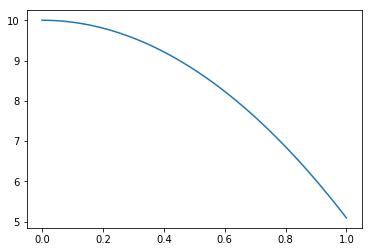

In [8]:
plt.plot(t_trj, x_trj)

A curved line is what is expected here as the object starts slow and speeds up as it accelerates towards the ground

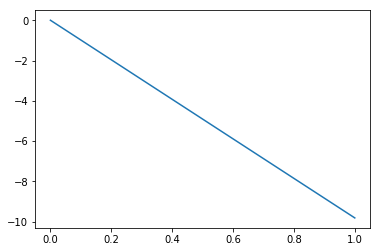

In [10]:
plt.plot(t_trj, v_trj)

This is also what is expected here.
[Free fall graphs](http://www.physicsclassroom.com/class/1DKin/Lesson-5/Representing-Free-Fall-by-Graphs)

### Analytical Solution ###

$$F = ma$$

$$F = mg$$

$$a = \frac{d^2x}{dt^2}$$

$$\therefore m\frac{d^2x}{dt^2} = mg$$

The m values are present on both sides of the equation so can be cancelled out:
$$\frac{d^2x}{dt^2} = g$$

This is the same as:
$$\frac{d}{dt} \frac{dx}{dt} = g$$

Let $u = \frac{dx}{dt}$
$$\frac{du}{dt} = g$$

Separate the variables:
$$du = g dt$$

$$\int_{u_0}^{u}dt=\int_{t_0}^{t}gdt$$
$$u-u_0=gt-gt_0$$

Rearrange and set $-gt_0+u_0$ to a constant $C_1$ 
$$u=gt+C_1$$

As $u = \frac{dx}{dt}$
$$\frac{dx}{dt}=gt+C_1$$

$$\int_{x_0}^{x}dx=\int_{t_0}^{t}gt+C_1dt$$

$$x-x_0=\frac{1}{2}gt^2+C_1t-\frac{1}{2}gt_0^2+C_1t_0$$

Rearrange and set $\frac{1}{2}gt_0^2+C_1t_0+x_0$ to a constant $C_2$

$$x=\frac{1}{2}gt^2+C_1t+C_2$$

$$V=\frac{dx}{dt}$$

$$V=gt+C_1$$

Initial conditions: $x(0)=x_0$ and $\frac{dx}{dt}(0)=V_0$

$$x(0)=C_2=x_0$$

$$\frac{dx}{dt}(0)=C_1=V_0$$

$$x=\frac{1}{2}gt^2+V_0t+x_0$$

$$V=gt+V_0$$

$$a=\frac{dV}{dt}$$

$$a=g$$